In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
radii = [1.0, 0.5] # Outer is always first
velocities = [1.0, 0.7]

In [3]:
def draw_earth(radii):
    colors = ['y','b','r','g']
    for i,r in enumerate(radii):
        circle = plt.Circle((0, 0), radius=r,fc=colors[i],alpha=0.3)
        plt.gca().add_patch(circle)
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)


<IPython.core.display.Javascript object>


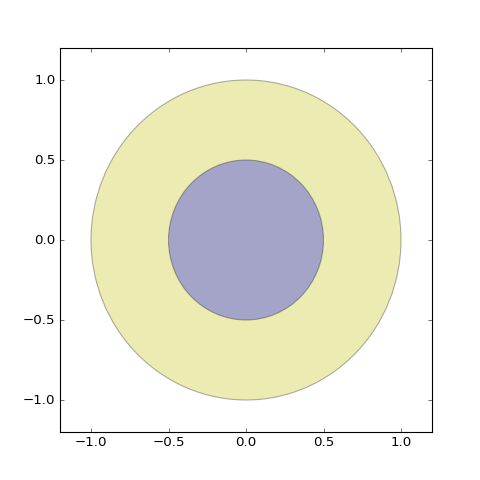

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = draw_earth(radii)

In [6]:
def normal(r,x,y):
    return r

def snells(theta0,v0,v1):
    sin_theta1 = np.sin(theta0)*(v1/v0)
    theta1 = np.arcsin(sin_theta1)
    return theta1

def mag(x,y):
    r = np.sqrt(x*x + y*y)
    return r

def rel_angle(x0,y0, x1,y1):
    mag0 = mag(x0,y0)
    mag1 = mag(x1,y1)
    
    cos_theta = (x0*x1 + y0*y1)/(mag0*mag1)
    
    theta = np.arccos(cos_theta)
    return theta

In [7]:
rel_angle(1,1, 0,1)

0.78539816339744839

In [8]:
def linear(m,b,x):
    y = b + m*x
    return y

def radial_dist(x,y):
    r2 = x*x + y*y
    r = np.sqrt(r2)
    return r

def vector_representation(x0,y0, x1,y1, norm=False):
    #theta = np.arctan2(y1-y0,x1-x0)
    dx = x1-x0
    dy = y1-y0
    vec_mag = 1.0
    if norm==True:
        vec_mag = mag(dx,dy)
    x = dx/vec_mag
    y = dy/vec_mag
    #y = vec_mag*np.sin(theta)
    return x,y

def new_y(x0,y0,x1,theta):
    y = (x1-x0)*np.tan(theta) + y0
    return y

In [9]:
vector_representation(3,3,  4,4)

(1.0, 1.0)

In [10]:
def sgn(x):
    if x<0:
        return -1
    else:
        return +1 

def intersection(x1,y1, x2,y2, r):
    dx = x2-x1
    dy = y2-y1
    dr = mag(dx,dy)
    D = x1*y2 - x2*y1
    
    pts = []
    radical = r**2 * dr**2 - D**2 
    if radical<0:
        return None
    else:
        x = (D*dy + sgn(dy)*dx*np.sqrt(radical))/dr**2
        y = (-D*dx + np.abs(dy)*np.sqrt(radical))/dr**2
        pts.append(np.array([x,y]))
        if radical==0:
            return pts
        else:
            x = (D*dy + sgn(dy)*dx*-1*np.sqrt(radical))/dr**2
            y = (-D*dx + np.abs(dy)*-1*np.sqrt(radical))/dr**2
            pts.append(np.array([x,y]))
            return pts
        
def radial_pts(x,y,radius=1.0):
    theta = rel_angle(1.0, 0.0, x, y)
    rx = radius*np.cos(theta)
    ry = radius*np.sin(theta)
    
    rx *= x/np.abs(x)
    ry *= y/np.abs(y)
    
    return rx,ry

In [11]:
intersection(0.0,-1.0, 0.0, -0.9, 0.5)

[array([ 0. ,  0.5]), array([ 0. , -0.5])]

In [12]:
intercept = -1.0
angle = np.pi/2. - np.deg2rad(15.0)
slope = np.tan(angle)
print "ONE"

print slope
x0 = 0.0
y0 = intercept
x = 1.0
y = new_y(x0,y0,x,angle)

rays = []

pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print "first: ",closest
ray = [[x0,closest[0]],[y0,closest[1]]]
rays.append(ray)
rd0 = radial_pts(closest[0],closest[1])


# Next layer
print "TWO"
vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
cx = ray[0][1] # Circle x
cy = ray[1][1] # Circle y
t0 = rel_angle(cx,cy,vx,vy)

t1 = snells(t0,velocities[0],velocities[1])
norm_angle = rel_angle(cx,cy,1.0, 0.0)
print "norm: ",np.rad2deg(norm_angle)
print "t0: ",np.rad2deg(t0)
print "t1: ",np.rad2deg(t1)
angle -= (t1-t0) # Change in angle is the difference between t0 and t1
#angle = norm_angle - t1
print np.rad2deg(angle)



# Get the new point
x0 = closest[0]
y0 = closest[1]
x = x0 + 1.0
y = new_y(x0,y0,x,angle)

print "pts"
pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    furthest = None
    if len(pts)==1:
        furthest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            furthest = pts[1]
        else:
            furthest = pts[0]
            
        print furthest
ray[0].append(furthest[0])
ray[1].append(furthest[1])

rd1 = radial_pts(furthest[0],furthest[1])


print ray

# Get to outside layer
print "THREE"
x0 = ray[0][-2]
y0 = ray[1][-2]
x = ray[0][-1]
y = ray[1][-1]
cx = x
cy = y
vx,vy = vector_representation(x0,y0, x,y)
t0 = rel_angle(-cx,-cy,-vx,-vy)
t1 = snells(t0,velocities[1],velocities[0])
radial_angle = rel_angle(1.0, 0.0, cx,cy)
print "radial angle: ",np.rad2deg(radial_angle)
print "t0: ",np.rad2deg(t0)
print "t1: ",np.rad2deg(t1)
print t0,t1
#angle += (t0-t1)
angle = radial_angle+t1
print np.rad2deg(angle)


x1 = x + 1
y1 = new_y(x,y,x1,angle)

pts = intersection(x,y,x1,y1,radii[0])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x-pts[0][0],y-pts[0][1])
        d1 = mag(x-pts[1][0],y-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print closest

ray[0].append(closest[0])
ray[1].append(closest[1])

ONE
3.73205080757
[array([ 0.36072275,  0.34623561]), array([ 0.13927725, -0.48021021])]
first:  [ 0.13927725 -0.48021021]
TWO
norm:  73.8260478039
t0:  31.1739521961
t1:  21.2443827619
84.9295694342
pts
[array([ 0.22165148,  0.44818592]), array([ 0.13927725, -0.48021021])]
[ 0.22165148  0.44818592]
[[0.0, 0.13927725428276039, 0.22165147740882546], [-1.0, -0.48021021067804798, 0.44818592410124281]]
THREE
radial angle:  63.6851866723
t0:  21.2443827619
t1:  31.1739521961
0.370784426749 0.544088106682
94.8591388685
[array([ 0.17606879,  0.98437786]), array([ 0.33970889, -0.94053063])]
[ 0.17606879  0.98437786]


<IPython.core.display.Javascript object>


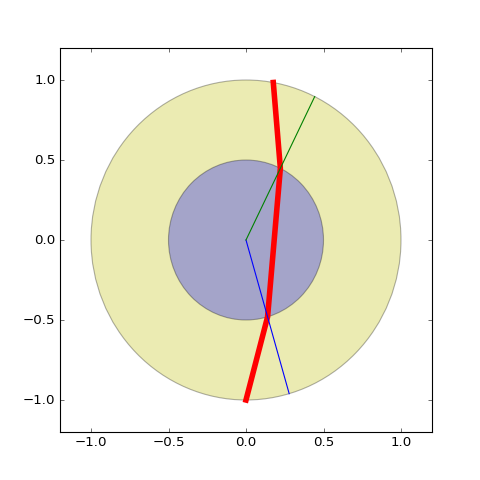

In [13]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
plt.plot(ray[0],ray[1],'r-',linewidth=5)
plt.plot([0,rd0[0]],[0.0,rd0[1]])
plt.plot([0,rd1[0]],[0.0,rd1[1]])

#plt.plot([0, 0.04391337],[0, -0.49806788])
#plt.plot([0, 0.29225], [0, 0.4057])

In [25]:
rays = []

for a in [5.0, 10.0, 15.0, 20.0,25.0, 27.0]:
    intercept = -1.0
    angle = np.pi/2. - np.deg2rad(a)
    slope = np.tan(angle)
    print "ONE"

    print slope
    x0 = 0.0
    y0 = intercept
    x = 1.0
    y = new_y(x0,y0,x,angle)

    pts = intersection(x0,y0,x,y,radii[1])
    if pts is not None:
        print pts
        closest = None
        if len(pts)==1:
            closest = pts[0]
        if len(pts)>1:
            d0 = mag(x0-pts[0][0],y0-pts[0][1])
            d1 = mag(x0-pts[1][0],y0-pts[1][1])
            if d0<d1:
                closest = pts[0]
            else:
                closest = pts[1]

            print "first: ",closest
    ray = [[x0,closest[0]],[y0,closest[1]]]
    rd0 = radial_pts(closest[0],closest[1])


    # Next layer
    print "TWO"
    vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
    cx = ray[0][1] # Circle x
    cy = ray[1][1] # Circle y
    t0 = rel_angle(cx,cy,vx,vy)

    t1 = snells(t0,velocities[0],velocities[1])
    norm_angle = rel_angle(cx,cy,1.0, 0.0)
    print "norm: ",np.rad2deg(norm_angle)
    print "t0: ",np.rad2deg(t0)
    print "t1: ",np.rad2deg(t1)
    angle -= (t1-t0) # Change in angle is the difference between t0 and t1
    #angle = norm_angle - t1
    print np.rad2deg(angle)



    # Get the new point
    x0 = closest[0]
    y0 = closest[1]
    x = x0 + 1.0
    y = new_y(x0,y0,x,angle)

    print "pts"
    pts = intersection(x0,y0,x,y,radii[1])
    if pts is not None:
        print pts
        furthest = None
        if len(pts)==1:
            furthest = pts[0]
        if len(pts)>1:
            d0 = mag(x0-pts[0][0],y0-pts[0][1])
            d1 = mag(x0-pts[1][0],y0-pts[1][1])
            if d0<d1:
                furthest = pts[1]
            else:
                furthest = pts[0]

            print furthest
    ray[0].append(furthest[0])
    ray[1].append(furthest[1])

    rd1 = radial_pts(furthest[0],furthest[1])


    print ray

    # Get to outside layer
    print "THREE"
    x0 = ray[0][-2]
    y0 = ray[1][-2]
    x = ray[0][-1]
    y = ray[1][-1]
    cx = x
    cy = y
    vx,vy = vector_representation(x0,y0, x,y)
    t0 = rel_angle(-cx,-cy,-vx,-vy)
    t1 = snells(t0,velocities[1],velocities[0])
    radial_angle = rel_angle(1.0, 0.0, cx,cy)
    print "radial angle: ",np.rad2deg(radial_angle)
    print "t0: ",np.rad2deg(t0)
    print "t1: ",np.rad2deg(t1)
    print t0,t1
    #angle += (t0-t1)
    angle = radial_angle+t1
    print np.rad2deg(angle)


    x1 = x + 1
    y1 = new_y(x,y,x1,angle)

    pts = intersection(x,y,x1,y1,radii[0])
    if pts is not None:
        print pts
        closest = None
        if len(pts)==1:
            closest = pts[0]
        if len(pts)>1:
            d0 = mag(x-pts[0][0],y-pts[0][1])
            d1 = mag(x-pts[1][0],y-pts[1][1])
            if d0<d1:
                closest = pts[0]
            else:
                closest = pts[1]

            print closest

    ray[0].append(closest[0])
    ray[1].append(closest[1])
    
    rays.append(ray)

ONE
11.4300523028
[array([ 0.12973481,  0.48287564]), array([ 0.04391337, -0.49806788])]
first:  [ 0.04391337 -0.49806788]
TWO
norm:  84.9614066818
t0:  10.0385933182
t1:  7.00858373881
88.0300095794
pts
[array([ 0.07803255,  0.49387339]), array([ 0.04391337, -0.49806788])]
[ 0.07803255  0.49387339]
[[0.0, 0.043913370110289757, 0.078032553305147551], [-1.0, -0.49806788284887094, 0.4938733852159673]]
THREE
radial angle:  81.0214258406
t0:  7.00858373881
t1:  10.0385933182
0.122322862144 0.175206505672
91.0600191588
[array([ 0.06871146,  0.99763658]), array([ 0.1055702 , -0.99441185])]
[ 0.06871146  0.99763658]
ONE
5.67128181962
[array([ 0.25242983,  0.43160072]), array([ 0.08959031, -0.4919081 ])]
first:  [ 0.08959031 -0.4919081 ]
TWO
norm:  79.6779629835
t0:  20.3220370165
t1:  14.0700173729
86.2520196436
pts
[array([ 0.15299719,  0.47601666]), array([ 0.08959031, -0.4919081 ])]
[ 0.15299719  0.47601666]
[[0.0, 0.089590311132337952, 0.15299718620715763], [-1.0, -0.49190809726127793, 0.

<IPython.core.display.Javascript object>


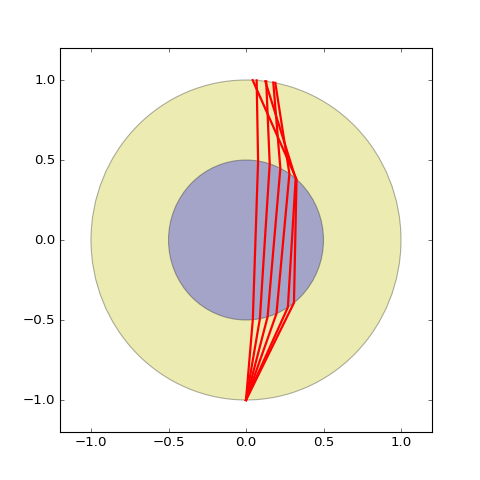

In [26]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=2)
#plt.plot([0,rd0[0]],[0.0,rd0[1]])
#plt.plot([0,rd1[0]],[0.0,rd1[1]])


In [19]:
rays

[[[0.0, 0.19665149461434028, 0.28001316005762161, 0.18905157143812554],
  [-1.0, -0.45970445904509788, 0.41423740800963982, 0.98196716000932305]],
 [[0.0, 0.19665149461434028, 0.28001316005762161, 0.18905157143812554],
  [-1.0, -0.45970445904509788, 0.41423740800963982, 0.98196716000932305]]]